# Version IV - saturation data augmentation

### Imports and initial setup

In [1]:
import import_ipynb

from InitialSetup import dataset, BATCH_SIZE, tf, prepare_callbacks, model_VI, show_history, test_dataset, AUTOTUNE, process_saturation

importing Jupyter notebook from InitialSetup.ipynb
Num GPUs Available:  1
Total images in validatation dataset:  12630
(32, 32, 3) (43,)
Total images in dataset:  39209


In [2]:
dataSoloV4 = dataset
dataSoloV4 = dataSoloV4.concatenate(dataSoloV4.map(process_saturation))

dataSoloV4_size = tf.data.experimental.cardinality(dataSoloV4).numpy()

dataSoloV4 = dataSoloV4.cache()
dataSoloV4 = dataSoloV4.shuffle(buffer_size = dataSoloV4_size)
dataSoloV4 = dataSoloV4.batch(batch_size = BATCH_SIZE)
dataSoloV4 = dataSoloV4.prefetch(buffer_size = AUTOTUNE)
dataSoloV4 = dataSoloV4.repeat()

train_size = int(0.8* dataSoloV4_size)
val_size = int(0.2* dataSoloV4_size)

train_dataset = dataSoloV4.take(train_size)
val_dataset = dataSoloV4.skip(train_size)

### Setup model and save place

In [3]:
modelV4 = model_VI(43, 32, 3)

file_pathV4 = './Networks/SaturationDataAugmentation.ckpt'

callbacksV4 = prepare_callbacks(file_pathV4)

### Train model

In [4]:
historyV4 = modelV4.fit(train_dataset, steps_per_epoch = train_size/BATCH_SIZE,
          epochs=20, 
          validation_data = val_dataset, 
          validation_steps = val_size/BATCH_SIZE,
          callbacks = callbacksV4)

Epoch 1/20
980/980 [==============================] - 47s 30ms/step - loss: 2.7440 - accuracy: 0.3167 - val_loss: 0.2644 - val_accuracy: 0.9287

Epoch 00001: val_accuracy improved from -inf to 0.92867, saving model to ./Networks\SaturationDataAugmentation.ckpt
Epoch 2/20
980/980 [==============================] - 29s 30ms/step - loss: 0.4321 - accuracy: 0.8690 - val_loss: 0.0539 - val_accuracy: 0.9865

Epoch 00002: val_accuracy improved from 0.92867 to 0.98653, saving model to ./Networks\SaturationDataAugmentation.ckpt
Epoch 3/20
980/980 [==============================] - 28s 29ms/step - loss: 0.1709 - accuracy: 0.9492 - val_loss: 0.0236 - val_accuracy: 0.9953

Epoch 00003: val_accuracy improved from 0.98653 to 0.99530, saving model to ./Networks\SaturationDataAugmentation.ckpt
Epoch 4/20
980/980 [==============================] - 28s 29ms/step - loss: 0.0977 - accuracy: 0.9713 - val_loss: 0.0108 - val_accuracy: 0.9977

Epoch 00004: val_accuracy improved from 0.99530 to 0.99771, saving

### Show the learning history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


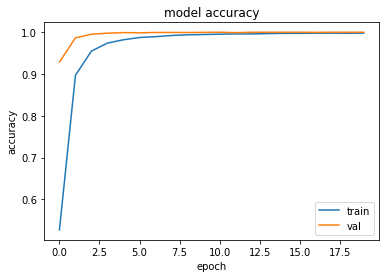

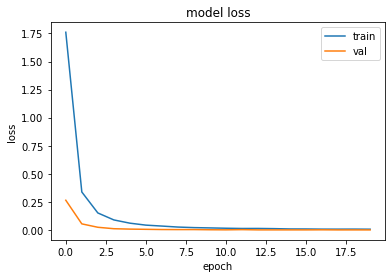

In [5]:
show_history(historyV4)

### Load weights from file and test with validation and test dataset

In [6]:
modelV4.load_weights(file_pathV4)

evalV4 = modelV4.evaluate(test_dataset, verbose=2)
valV4 = modelV4.evaluate(val_dataset, steps=val_size/BATCH_SIZE, verbose=2)

198/198 - 3s - loss: 0.0663 - accuracy: 0.9789
245/245 - 10s - loss: 0.0015 - accuracy: 0.9997
